In [1]:
# Performed as a part of curriculum at Great Learning
from sklearn.svm import SVC 
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [7]:
from google.colab import drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df=pd.read_csv('/content/drive/My Drive/creditcard.csv')

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape

(284807, 31)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
df[['Amount','Time','Class']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16
Time,284807.0,94813.859575,47488.145955,0.0,54201.5,84692.0,139320.500,172792.00
Class,284807.0,0.001727,0.041527,0.0,0.0,0.0,0.000,1.00


In [31]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [32]:
pd.DataFrame({'columns':df.isna().sum().index,'No of null values':df.isna().sum().values,'Percentage':df.isna().sum().values/df.shape[0]})

,columns,No of null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


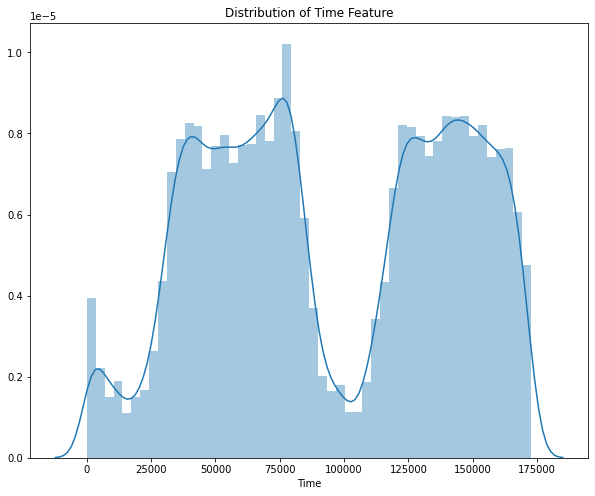

In [18]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

In [42]:
Genuine=0
Totalcount=df['Class']
for i in range (len(Totalcount)):
  if Totalcount[i]==0:
    Genuine=1+Genuine
Genuine
per_nf=round(((Genuine/(len(Totalcount)))*100),2)
print("Percentage of non fraudulent transactions",per_nf)

Percentage of non fraudulent transactions 99.83


In [44]:
print(Genuine)

284315


In [43]:
Fraud=0
Totalcount=df['Class']
for i in range (len(Totalcount)):
  if Totalcount[i]==1:
    Fraud=1+Fraud
per_f=round(((Fraud/(len(Totalcount)))*100),2)
print("Percentage of fraudulent transactions",per_f)

Percentage of fraudulent transactions 0.17


In [50]:
print(Fraud)

492


In [52]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=Fraud
plot_data['Genuine Transaction']=Genuine
plot_data

,Fraud Transaction,Genuine Transaction


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

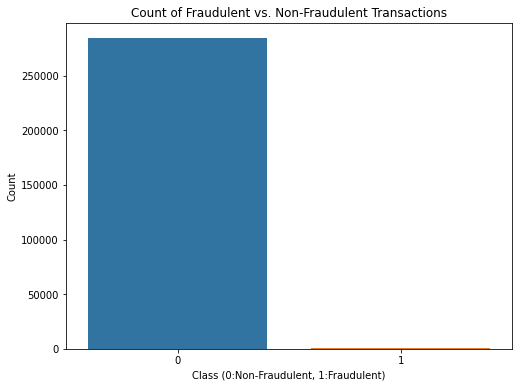

In [30]:
plt.figure(figsize=(8,6))
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1.0, 'Time vs Amount')

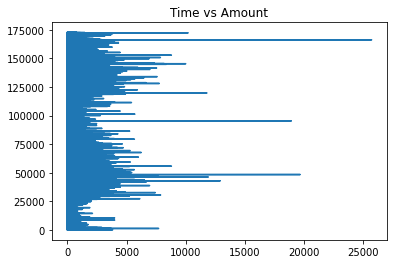

In [53]:
x=df.Amount
y=df.Time
plt.plot(x,y)
plt.title('Time vs Amount')

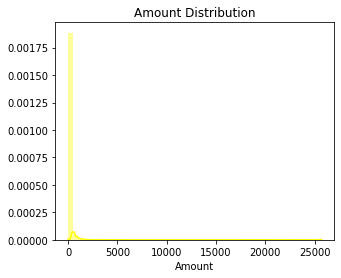

In [61]:
plt.figure(figsize=(5,4))
plt.title('Amount Distribution')
sns.distplot(df.Amount,color='yellow')

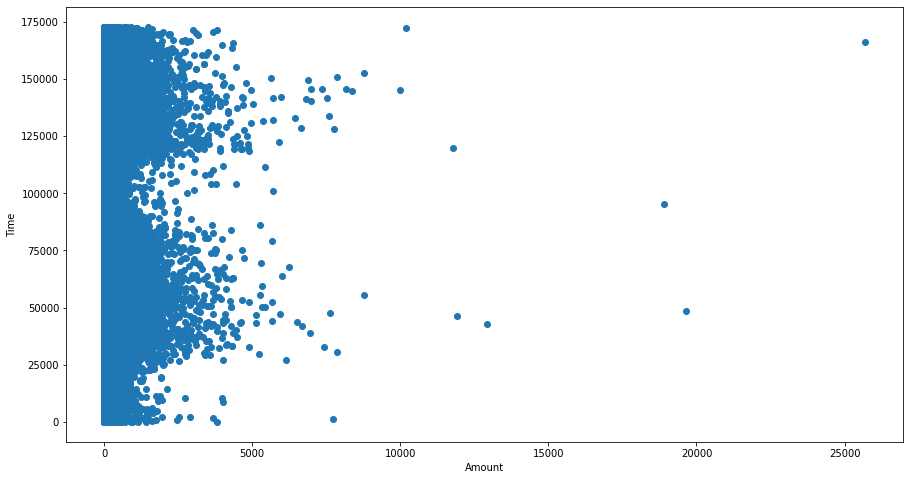

In [63]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(df.Amount,df.Time)
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

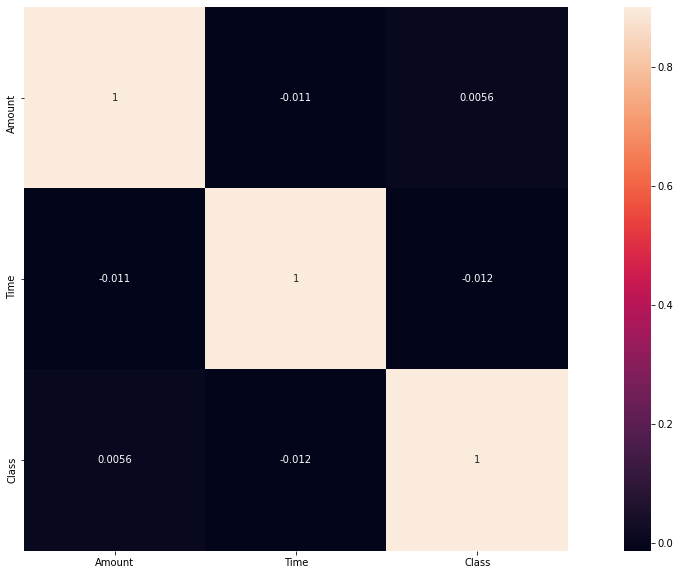

In [69]:
correlation_matrics=df[['Amount','Time','Class']].corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrics,vmax=0.9,square=True,annot=True)
plt.show()

In [71]:
x=df.drop(['Class'],axis=1)
y=df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [73]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred=lr.predict(x_test)
accuracy=lr.score(x_test,y_test)
print("The model accuracy is :" ,(round((accuracy*100),2)))

The model accuracy is : 99.86


In [79]:
from sklearn.metrics import confusion_matrix

In [82]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[56829    35]
 [   45    53]]
